In [51]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import seaborn as sns; sns.set()
from matplotlib import dates
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [52]:
#read the csv and show the head, we are using v1 and not v1.0.1 as it wasn't released when I did this 
jedi = pd.read_csv('jedi_v1_og.csv', low_memory=False)
jedi.head()

,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,Pre-Flare Start Time,Pre-Flare End Time,Flare Interrupt,9.4 Pre-Flare Irradiance [W/m2],13.1 Pre-Flare Irradiance [W/m2],13.3 Pre-Flare Irradiance [W/m2],...,103.2 by 63.0 Fitting Score,103.2 by 71.9 Fitting Score,103.2 by 72.2 Fitting Score,103.2 by 77.0 Fitting Score,103.2 by 79.0 Fitting Score,103.2 by 83.6 Fitting Score,103.2 by 95.0 Fitting Score,103.2 by 97.3 Fitting Score,103.2 by 97.7 Fitting Score,103.2 by 102.6 Fitting Score
0,1.0,2010-05-04 16:15:00.000,2010-05-04 16:29:00.000,C3.6,2010-05-04 08:29:00.000,2010-05-04 16:29:00.000,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2010-05-05 07:09:00.000,2010-05-05 07:16:00.000,C2.3,2010-05-04 23:16:00.000,2010-05-05 07:16:00.000,True,0.000004,0.000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,2010-05-05 11:37:00.000,2010-05-05 11:52:00.000,C8.8,2010-05-04 23:16:00.000,2010-05-05 07:16:00.000,True,0.000004,0.000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2010-05-05 17:13:00.000,2010-05-05 17:19:00.000,M1.2,2010-05-04 23:16:00.000,2010-05-05 07:16:00.000,False,0.000004,0.000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2010-05-07 07:29:00.000,2010-05-07 07:42:00.000,C2.0,2010-05-06 23:42:00.000,2010-05-07 07:42:00.000,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
#describe what is inside of the jedi catalog
jedi.describe()

,Event #,9.4 Pre-Flare Irradiance [W/m2],13.1 Pre-Flare Irradiance [W/m2],13.3 Pre-Flare Irradiance [W/m2],17.1 Pre-Flare Irradiance [W/m2],17.7 Pre-Flare Irradiance [W/m2],18.0 Pre-Flare Irradiance [W/m2],19.5 Pre-Flare Irradiance [W/m2],20.2 Pre-Flare Irradiance [W/m2],21.1 Pre-Flare Irradiance [W/m2],...,103.2 by 63.0 Fitting Score,103.2 by 71.9 Fitting Score,103.2 by 72.2 Fitting Score,103.2 by 77.0 Fitting Score,103.2 by 79.0 Fitting Score,103.2 by 83.6 Fitting Score,103.2 by 95.0 Fitting Score,103.2 by 97.3 Fitting Score,103.2 by 97.7 Fitting Score,103.2 by 102.6 Fitting Score
count,4770.000000,1720.000000,2.447000e+03,3.500000e+01,1043.000000,962.000000,1033.000000,1150.000000,1094.000000,1154.000000,...,211.000000,0.0,0.0,28.000000,68.000000,234.000000,0.0,13.000000,281.000000,234.000000
mean,2591.981761,0.000007,3.089379e-06,1.231644e-06,0.000062,0.000045,0.000068,0.000055,0.000050,0.000036,...,-0.168505,NaN,NaN,-0.275949,-0.436921,-0.277788,NaN,-0.234422,-0.375906,-0.262103
std,1427.123541,0.000001,3.526283e-07,5.632303e-08,0.000005,0.000004,0.000007,0.000007,0.000008,0.000007,...,0.925214,NaN,NaN,0.509231,0.910583,0.563634,NaN,0.359992,1.221007,0.535941
min,1.000000,0.000004,2.165025e-06,1.084732e-06,0.000050,0.000033,0.000045,0.000030,0.000024,0.000012,...,-10.069916,NaN,NaN,-1.313930,-5.666442,-4.520655,NaN,-0.663326,-14.528566,-4.296279
25%,1387.250000,0.000007,2.862372e-06,1.257444e-06,0.000058,0.000042,0.000063,0.000051,0.000046,0.000032,...,-0.446694,NaN,NaN,-0.543729,-0.577064,-0.520851,NaN,-0.584188,-0.611858,-0.532444
50%,2626.500000,0.000007,3.114408e-06,1.257444e-06,0.000062,0.000046,0.000067,0.000057,0.000053,0.000037,...,-0.082531,NaN,NaN,-0.317944,-0.319469,-0.186389,NaN,-0.277578,-0.189077,-0.212825
75%,3820.750000,0.000008,3.321916e-06,1.257444e-06,0.000065,0.000048,0.000074,0.000061,0.000055,0.000040,...,0.311428,NaN,NaN,0.028846,-0.035912,0.012193,NaN,-0.078080,0.115295,0.050080
max,5059.000000,0.000009,3.954051e-06,1.270700e-06,0.000078,0.000056,0.000084,0.000075,0.000069,0.000052,...,0.939408,NaN,NaN,0.702500,0.509037,0.908943,NaN,0.470036,0.781192,0.887325


In [55]:
jedi.shape

(4770, 24304)

In [56]:
jedi.filter(regex='17.1 by \d+.\d Depth \[%\]').describe()
#looking at just the by _, which is used for subtracting off the flare. 

,17.1 by 9.4 Depth [%],17.1 by 13.1 Depth [%],17.1 by 13.3 Depth [%],17.1 by 17.7 Depth [%],17.1 by 18.0 Depth [%],17.1 by 19.5 Depth [%],17.1 by 20.2 Depth [%],17.1 by 21.1 Depth [%],17.1 by 25.6 Depth [%],17.1 by 28.4 Depth [%],...,17.1 by 71.9 Depth [%],17.1 by 72.2 Depth [%],17.1 by 77.0 Depth [%],17.1 by 79.0 Depth [%],17.1 by 83.6 Depth [%],17.1 by 95.0 Depth [%],17.1 by 97.3 Depth [%],17.1 by 97.7 Depth [%],17.1 by 102.6 Depth [%],17.1 by 103.2 Depth [%]
count,25.000000,29.000000,0.0,32.000000,17.000000,16.000000,8.000000,14.000000,30.000000,15.000000,...,0.0,0.0,0.0,0.0,3.000000,0.0,0.0,0.0,2.000000,2.000000
mean,1.711764,1.870080,NaN,5.452663,3.395906,6.501903,4.088976,2.741880,1.939886,1.938647,...,NaN,NaN,NaN,NaN,2.167710,NaN,NaN,NaN,4.000506,1.746328
std,1.428020,1.913158,NaN,9.552226,3.827770,17.721406,6.453698,2.108528,1.646943,1.533009,...,NaN,NaN,NaN,NaN,1.532759,NaN,NaN,NaN,0.000000,0.000000
min,0.134579,0.018820,NaN,0.184871,0.039491,0.006893,0.271297,0.633056,0.053956,0.173777,...,NaN,NaN,NaN,NaN,0.397832,NaN,NaN,NaN,4.000506,1.746328
25%,0.555718,0.379589,NaN,0.600500,1.055443,0.788380,0.777392,1.059322,0.825934,0.746586,...,NaN,NaN,NaN,NaN,1.725240,NaN,NaN,NaN,4.000506,1.746328
50%,1.448156,1.353241,NaN,1.304412,1.621514,1.585201,2.086252,2.177716,1.737623,1.705310,...,NaN,NaN,NaN,NaN,3.052648,NaN,NaN,NaN,4.000506,1.746328
75%,2.411504,2.438551,NaN,4.217519,4.361785,2.471019,3.530524,2.852111,2.491011,2.629607,...,NaN,NaN,NaN,NaN,3.052648,NaN,NaN,NaN,4.000506,1.746328
max,5.072228,6.475059,NaN,36.476488,15.300587,72.230589,19.746803,6.979734,6.715509,4.912654,...,NaN,NaN,NaN,NaN,3.052648,NaN,NaN,NaN,4.000506,1.746328


In [57]:
#get euv171 by 177 depth percent data. 
euv171 = jedi.filter(regex='17.1 by \d+.\d Depth \[%\]').T.values[3]
euv171

array([nan, nan, nan, ..., nan, nan, nan])

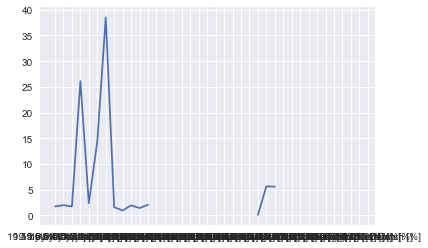

In [58]:
plt.plot(np.mean(jedi.filter(regex='19.5 by \d+.\d Depth \[%\]')));
#plot it, and see nothing of interest, 

In [59]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [60]:
#sub catalog of jedi with just a few wavelengths
jedi_sub = jedi[['19.5 by 13.1 Depth [%]', '17.1 by 17.7 Depth [%]', '21.1 by 13.1 Depth [%]']]
jedi_sub

,19.5 by 13.1 Depth [%],17.1 by 17.7 Depth [%],21.1 by 13.1 Depth [%]
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,1.788526,NaN


# PCA on jedi_sub, seeing if anything is there

In [61]:
X_jedi = jedi_sub.values


In [62]:
from sklearn.preprocessing import normalize
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA

imp = Imputer(strategy='mean')
X_jedi_filled = imp.fit_transform(X_jedi)
X_jedi_filled_norm = normalize(X_jedi_filled)

model = PCA(n_components=2);
model.fit_transform(X_jedi_filled_norm);

In [63]:

print(X_jedi_filled_norm)

[[0.33661402 0.92274987 0.18767974]
 [0.33661402 0.92274987 0.18767974]
 [0.33661402 0.92274987 0.18767974]
 ...
 [0.33661402 0.92274987 0.18767974]
 [0.33661402 0.92274987 0.18767974]
 [0.33661402 0.92274987 0.18767974]]


In [64]:
print(model.mean_)

[0.33794193 0.9201562  0.18872026]


ValueError: too many values to unpack (expected 2)

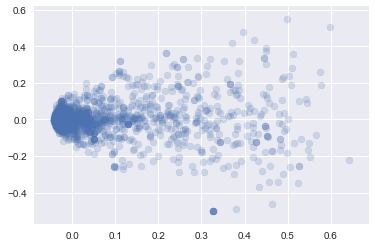

In [73]:
#trying to draw eigenvectors, for some reason could not get it to work.
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
#draw plot
plt.scatter(jedi_2d[:, 0], jedi_2d[:, 1], alpha=.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [66]:
jedi.head()

,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,Pre-Flare Start Time,Pre-Flare End Time,Flare Interrupt,9.4 Pre-Flare Irradiance [W/m2],13.1 Pre-Flare Irradiance [W/m2],13.3 Pre-Flare Irradiance [W/m2],...,103.2 by 63.0 Fitting Score,103.2 by 71.9 Fitting Score,103.2 by 72.2 Fitting Score,103.2 by 77.0 Fitting Score,103.2 by 79.0 Fitting Score,103.2 by 83.6 Fitting Score,103.2 by 95.0 Fitting Score,103.2 by 97.3 Fitting Score,103.2 by 97.7 Fitting Score,103.2 by 102.6 Fitting Score
0,1.0,2010-05-04 16:15:00.000,2010-05-04 16:29:00.000,C3.6,2010-05-04 08:29:00.000,2010-05-04 16:29:00.000,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2010-05-05 07:09:00.000,2010-05-05 07:16:00.000,C2.3,2010-05-04 23:16:00.000,2010-05-05 07:16:00.000,True,0.000004,0.000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,2010-05-05 11:37:00.000,2010-05-05 11:52:00.000,C8.8,2010-05-04 23:16:00.000,2010-05-05 07:16:00.000,True,0.000004,0.000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2010-05-05 17:13:00.000,2010-05-05 17:19:00.000,M1.2,2010-05-04 23:16:00.000,2010-05-05 07:16:00.000,False,0.000004,0.000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2010-05-07 07:29:00.000,2010-05-07 07:42:00.000,C2.0,2010-05-06 23:42:00.000,2010-05-07 07:42:00.000,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# Clean the data -- PCA can't handle string types so I have to drop all of my timestamps, which really I should drop anyway for this analysis
jedi_no_times = jedi.select_dtypes(exclude=['object'])

# PCA also can't handle NaN so I need to impute (fill) those values with something

In [68]:
model = PCA(n_components=2)

imp = Imputer(strategy='mean')
jedi_F = imp.fit_transform(jedi_no_times)

jedi_F_N = normalize(jedi_F)

model.fit(jedi_F_N)
jedi_2d = model.transform(jedi_F_N)

C:\Users\kelly\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\kelly\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



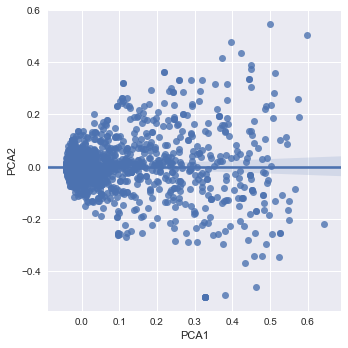

In [69]:
#pca shows us nothing useful.
jedi_no_times['PCA1'] = jedi_2d[:, 0]
jedi_no_times['PCA2'] = jedi_2d[:, 1]
sns.lmplot("PCA1", "PCA2", data=jedi_no_times)

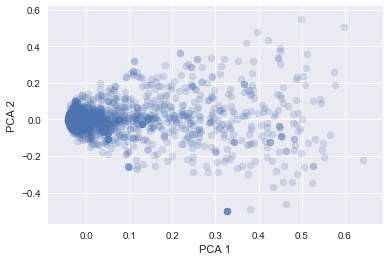

In [70]:
plt.scatter(jedi_2d[:, 0], jedi_2d[:, 1], alpha=0.2)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2");

Text(0,0.5,'comulative explained variance')

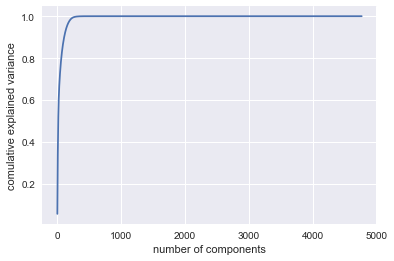

In [71]:
imp = Imputer(strategy='mean')
jedi_filled = imp.fit_transform(jedi_no_times)

pca = PCA().fit(jedi_filled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('comulative explained variance')
#Shows us that we only really need ~500 dimensions instead of the ~24,000 to keep 99% of the information JEDI has. This
#makes sense as JEDI is very sparse, its mostly empty or metadata. 

In [74]:
model = PCA(n_components=450)

imp = Imputer(strategy='mean')
jedi_F = imp.fit_transform(jedi_no_times)

jedi_F_N = normalize(jedi_F)

model.fit(jedi_F_N)
jedi_450d = model.transform(jedi_F_N)

In [ ]:
from sklearn.svm import SVC
model2 = SVC(kernel='rbf', c = 10)